<a href="https://colab.research.google.com/github/britbrat0/cs676/blob/main/session1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Read the dataset
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Separate features (X) and target variable (y)
X = df.drop('median_house_value', axis=1)  # Features
y = df['median_house_value']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Model Performance:")
print(f"Root Mean Squared Error: ${rmse:,.2f}")
print(f"R-squared Score: {r2:.4f}")

# Print feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Coefficient', key=abs, ascending=False))

# Print the intercept
print(f"\nIntercept: ${model.intercept_:,.2f}")

Model Performance:
Root Mean Squared Error: $68,078.33
R-squared Score: 0.6636

Feature Importance:
              Feature   Coefficient
0           longitude -43465.247687
1            latitude -43106.304441
7       median_income  40194.726347
2  housing_median_age   1131.724382
4      total_bedrooms    113.707973
6          households     45.147555
5          population    -35.657077
3         total_rooms     -8.843261

Intercept: $-3,652,253.13


                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     2959.
Date:                Mon, 08 Sep 2025   Prob (F-statistic):               0.00
Time:                        17:34:08   Log-Likelihood:            -1.7099e+05
No. Observations:               13600   AIC:                         3.420e+05
Df Residuals:                   13591   BIC:                         3.421e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.652e+06   7.79

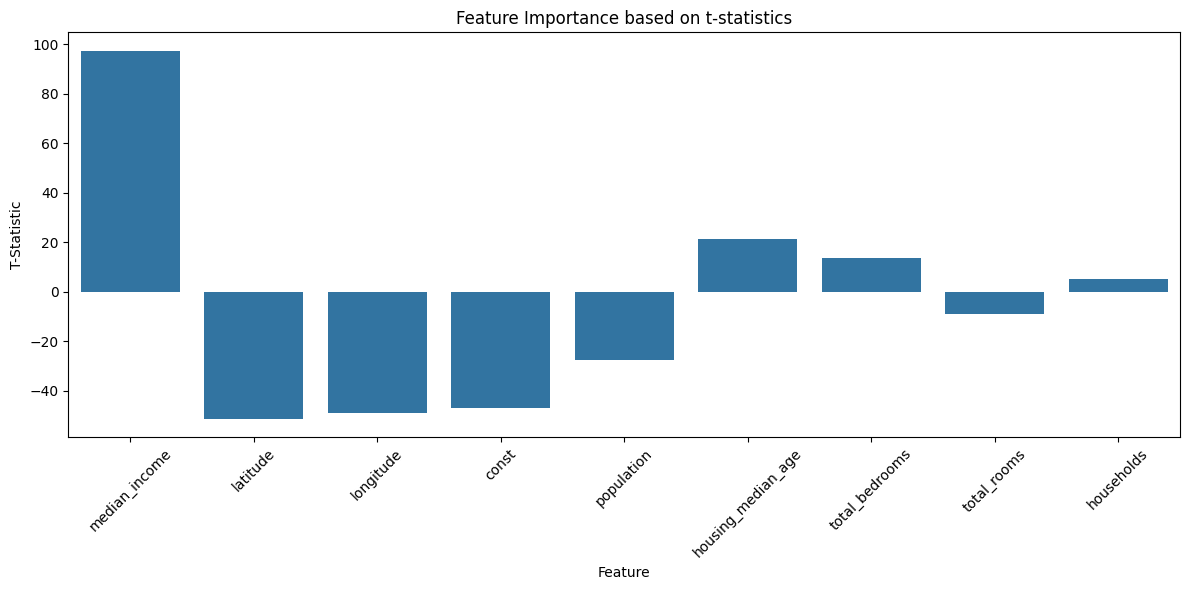

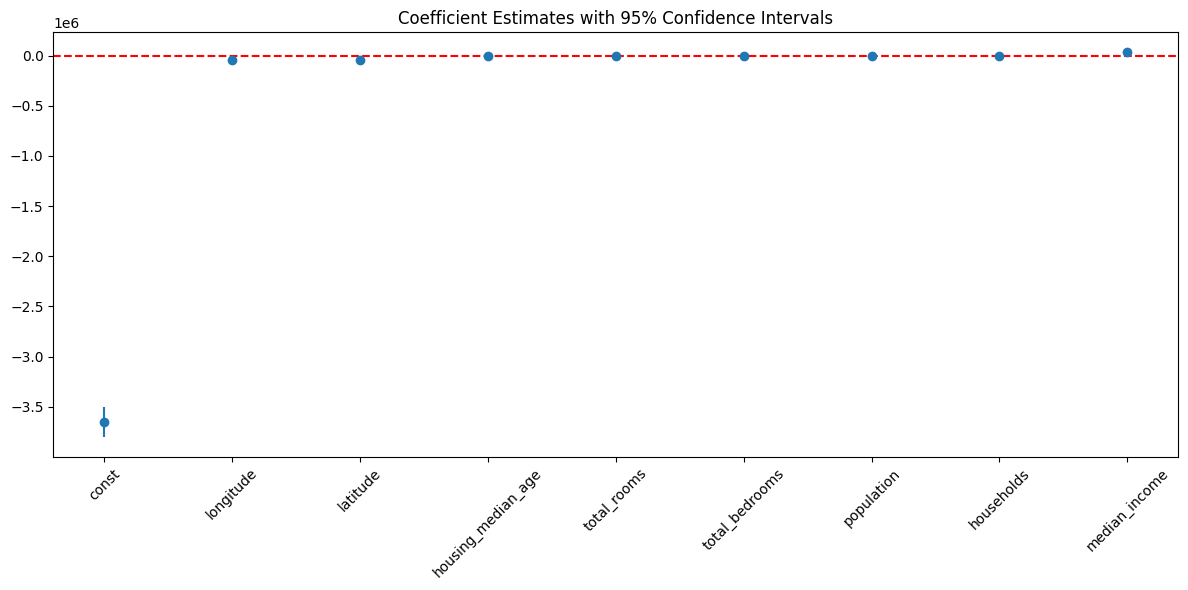

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

# Read the dataset
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Separate features (X) and target variable (y)
X = df.drop('median_house_value', axis=1)  # Features
y = df['median_house_value']  # Target variable

# Add constant term for statsmodels
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model using statsmodels
model = sm.OLS(y_train, X_train).fit()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print model summary
print(model.summary())

# Create feature importance DataFrame based on t-statistics
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'T-Statistic': model.tvalues,
    'P-Value': model.pvalues,
    'Coefficient': model.params
})

# Sort by absolute t-statistic values
feature_importance_sorted = feature_importance.sort_values(
    by='T-Statistic',
    key=abs,
    ascending=False
)

print("\nFeature Importance based on t-statistics:")
print(feature_importance_sorted)

# Print model performance metrics
print("\nModel Performance:")
print(f"Root Mean Squared Error: ${rmse:,.2f}")
print(f"R-squared Score: {r2:.4f}")

# Visualize t-statistics
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    data=feature_importance_sorted,
    x='Feature',
    y='T-Statistic'
)
plt.xticks(rotation=45)
plt.title('Feature Importance based on t-statistics')
plt.tight_layout()
plt.show()

# Create confidence intervals plot
coef_df = pd.DataFrame({
    'Coefficient': model.params,
    'Standard Error': model.bse,
    'Lower CI': model.conf_int()[0],
    'Upper CI': model.conf_int()[1]
}).reset_index()
coef_df = coef_df.rename(columns={'index': 'Feature'})

plt.figure(figsize=(12, 6))
plt.errorbar(
    x=range(len(coef_df)),
    y=coef_df['Coefficient'],
    yerr=[coef_df['Coefficient'] - coef_df['Lower CI'],
          coef_df['Upper CI'] - coef_df['Coefficient']],
    fmt='o'
)
plt.axhline(y=0, color='r', linestyle='--')
plt.xticks(range(len(coef_df)), coef_df['Feature'], rotation=45)
plt.title('Coefficient Estimates with 95% Confidence Intervals')
plt.tight_layout()
plt.show()

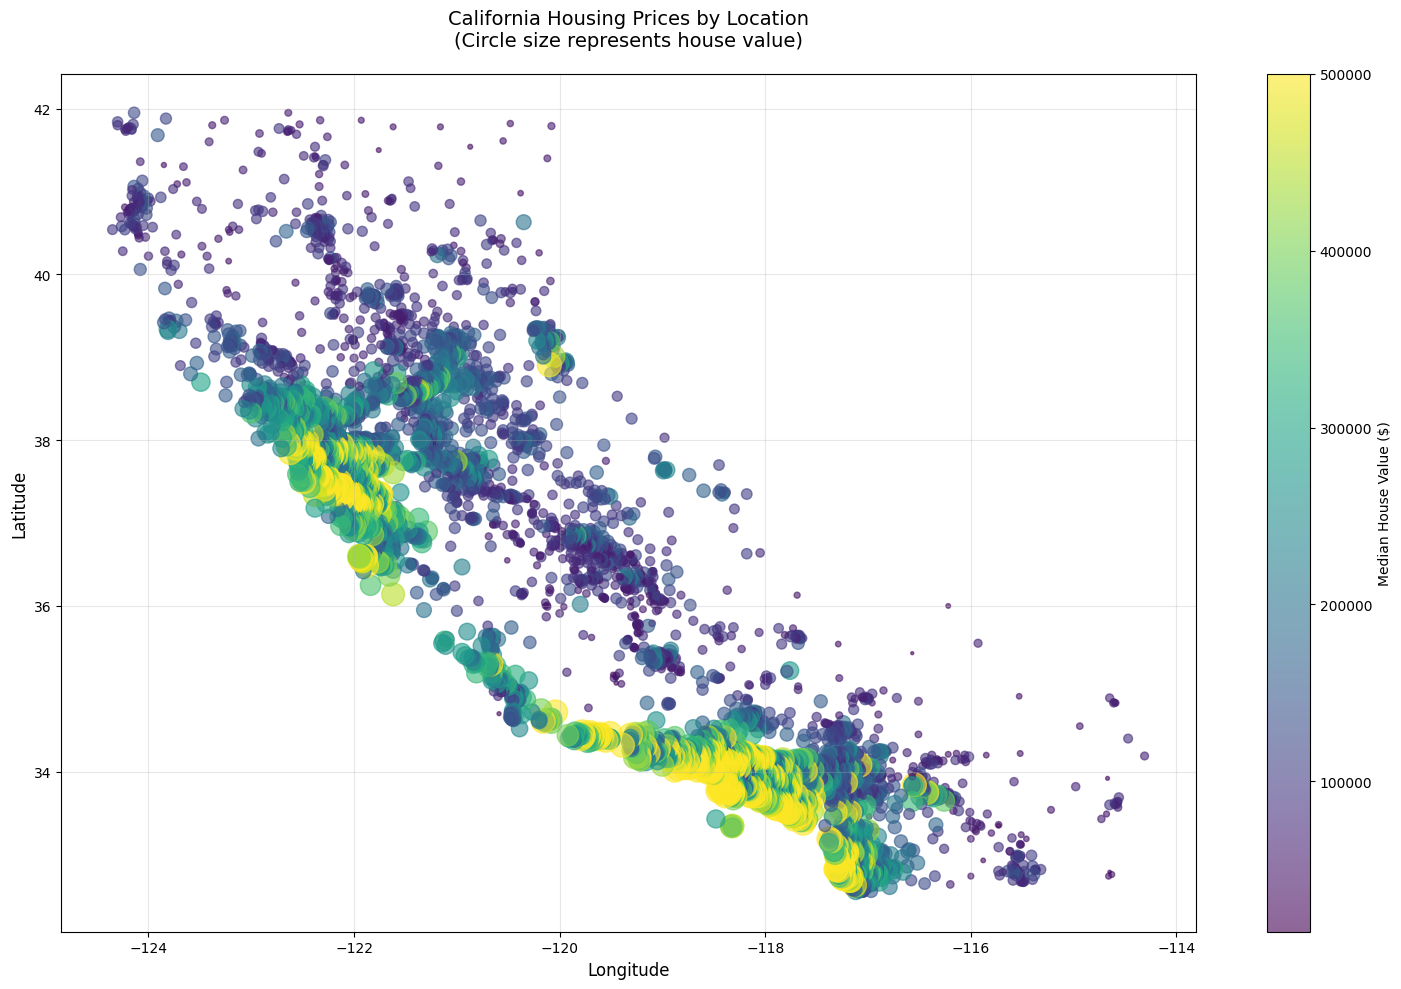

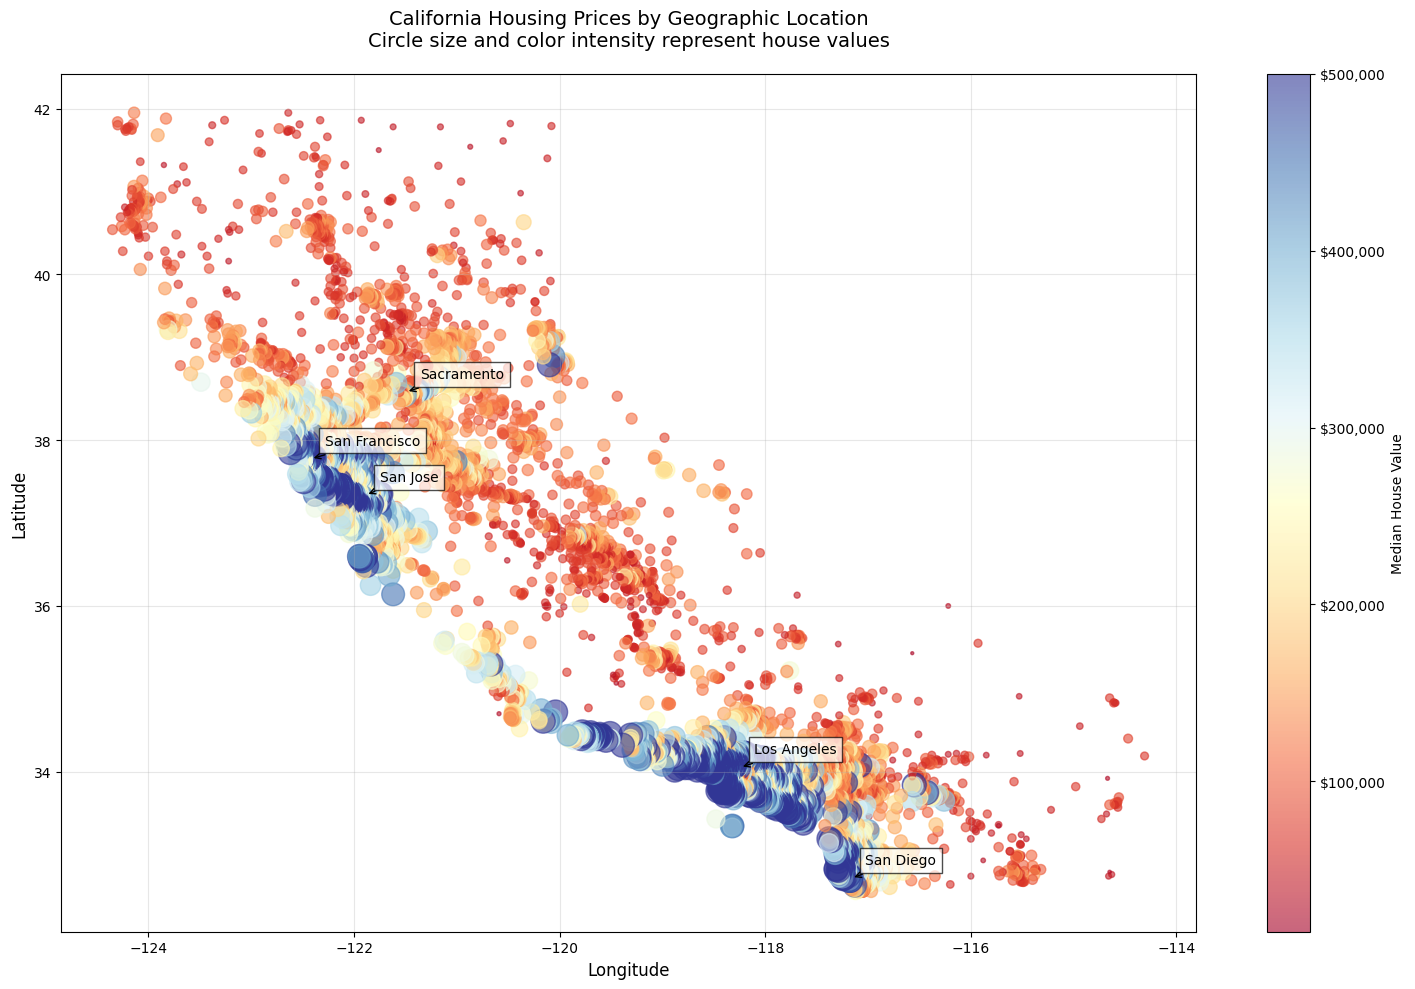

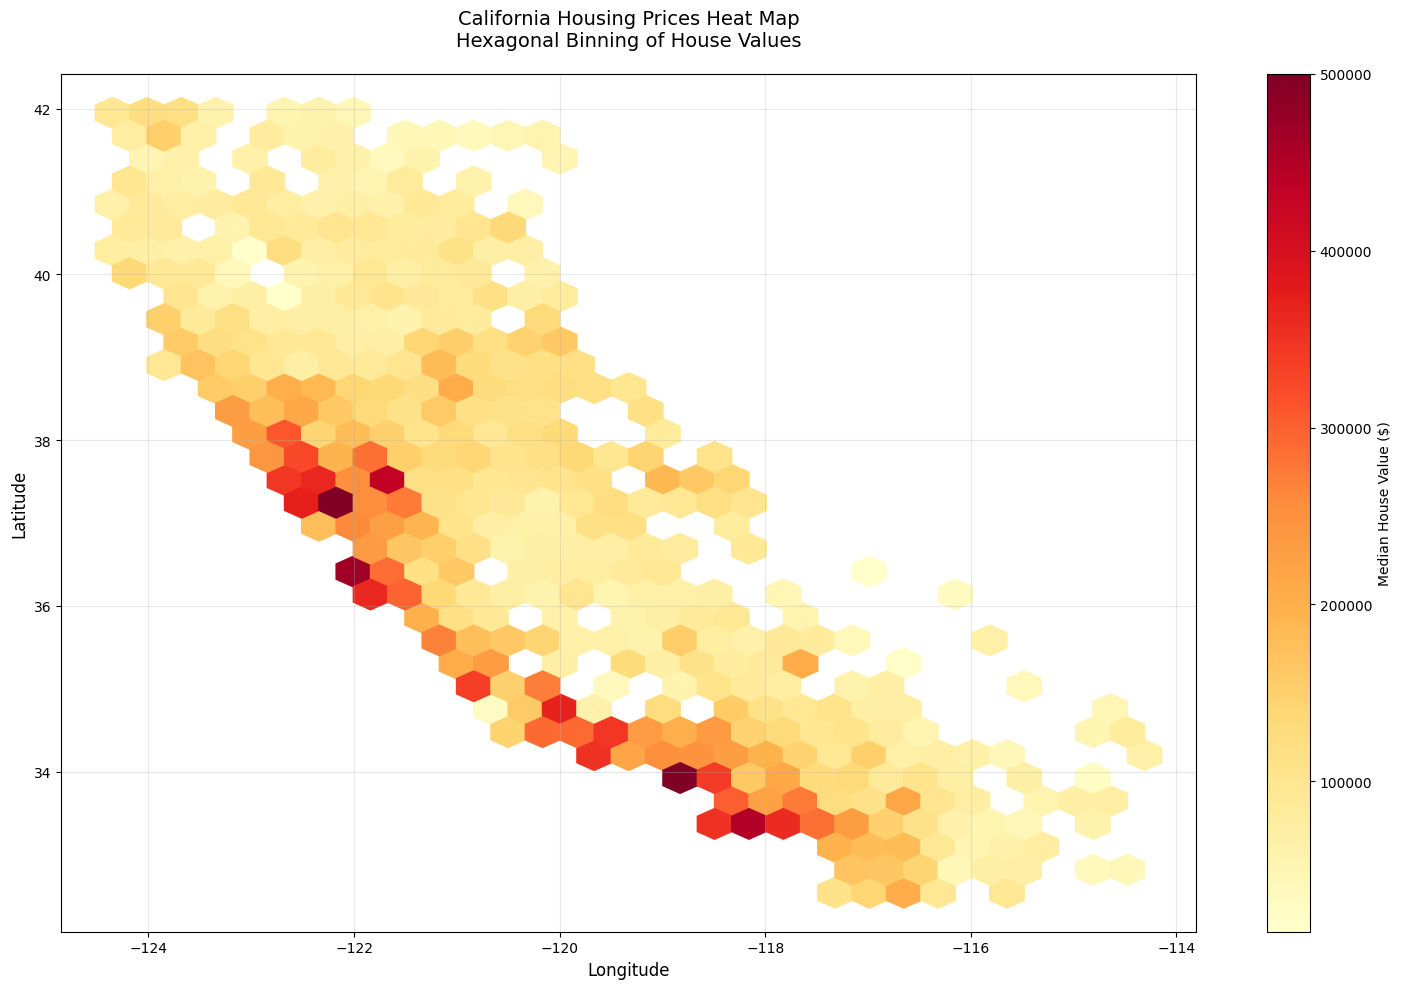

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Create the figure and axis
plt.figure(figsize=(15, 10))

# Create scatter plot
# Normalize housing values for better circle sizing
size = (df['median_house_value'] - df['median_house_value'].min()) / (df['median_house_value'].max() - df['median_house_value'].min())
size = size * 300  # Scale factor for circle sizes

# Create scatter plot with a colormap based on housing values
scatter = plt.scatter(df['longitude'],
                     df['latitude'],
                     c=df['median_house_value'],
                     s=size,
                     alpha=0.6,
                     cmap='viridis')

# Add colorbar
plt.colorbar(scatter, label='Median House Value ($)')

# Customize the plot
plt.title('California Housing Prices by Location\n(Circle size represents house value)',
          fontsize=14, pad=20)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Create a second visualization with additional context
fig, ax = plt.subplots(figsize=(15, 10))

# Create scatter plot with different color scheme
scatter = plt.scatter(df['longitude'],
                     df['latitude'],
                     c=df['median_house_value'],
                     s=size,
                     alpha=0.6,
                     cmap='RdYlBu')

# Add colorbar with formatted labels
formatter = plt.FuncFormatter(lambda x, p: f'${x:,.0f}')
plt.colorbar(scatter, label='Median House Value', format=formatter)

# Add annotations for major cities
cities = {
    'San Francisco': (-122.4194, 37.7749),
    'Los Angeles': (-118.2437, 34.0522),
    'Sacramento': (-121.4944, 38.5816),
    'San Diego': (-117.1611, 32.7157),
    'San Jose': (-121.8863, 37.3382)
}

for city, coords in cities.items():
    plt.annotate(city,
                xy=coords,
                xytext=(10, 10),
                textcoords='offset points',
                fontsize=10,
                bbox=dict(facecolor='white', alpha=0.7),
                arrowprops=dict(arrowstyle='->'))

# Customize the plot
plt.title('California Housing Prices by Geographic Location\n' +
          'Circle size and color intensity represent house values',
          fontsize=14, pad=20)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Add grid
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Optional: Create a third visualization showing housing density
plt.figure(figsize=(15, 10))

# Create a hexbin plot
hb = plt.hexbin(df['longitude'],
                df['latitude'],
                C=df['median_house_value'],
                gridsize=30,
                cmap='YlOrRd',
                reduce_C_function=np.median)

# Add colorbar
cb = plt.colorbar(hb, label='Median House Value ($)')

# Customize the plot
plt.title('California Housing Prices Heat Map\nHexagonal Binning of House Values',
          fontsize=14, pad=20)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Add grid
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()